In [38]:
from point_cloud import Tree
from features import RotVect, Segm, SumDirection
import branch as br
# from parameters import R, Ar, Dk, Bl, N, leaves, tree

from copy import copy
from scipy.spatial import KDTree
import numpy as np
import matplotlib.pyplot as plt

# default parameters
mm = 1
mkm = 0.001*mm
nm = 0.001*mkm

initial_br = br.Branch(np.array([0, 0]), np.array([0, 1]), Bl)

In [39]:
# Radius
R = 1
# Attractoin range
Ar = 0.3*R
# Kill distance
Dk = 0.25*R

''' kill distance have to be lower than the attraction range, but should also be greater
than the branch length to avoid weird results'''

# Branch length
Bl = 0.03*R

# Number of points
N = 100

leaves = Tree(N, R)
tree = KDTree(leaves.leaves)

# Main code

In [40]:
ROOTs = [copy(initial_br)]
lvs = leaves.leaves
output = [copy(initial_br)]
borders = False

while borders == False:

    if len(ROOTs) > 1:
        for n, r in enumerate(ROOTs):
            new_br = br.Grow2(lvs, r, Ar, Dk, Bl)
            borders = br.borders_reached(new_br)
            
            if br.match(ROOTs, new_br) == True:
                continue
            elif br.prob(n, ROOTs, v=1) == False:
                continue
            else:
                new_lvs = br.kill_attr(lvs, new_br)
                lvs = new_lvs
                tree = KDTree(lvs)
                # ROOTs[n] = new_br
                output.append(new_br)
                ROOTs.append(new_br)

    else: 
        new_br = br.Grow2(lvs, ROOTs[0], Ar, Dk, Bl)
        new_lvs = br.kill_attr(lvs, new_br)
        lvs = new_lvs
        tree = KDTree(lvs)
        ROOTs.append(new_br)
        # output.append(new_br)
        borders = br.borders_reached(new_br)

In [41]:
output = np.array(list(map(lambda x: list(x.segment), output)))

# Plot result

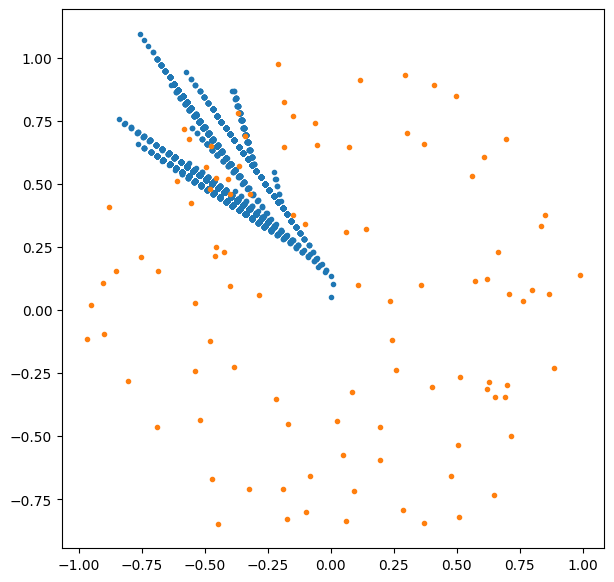

In [42]:
plt.figure(figsize=(7,7), dpi=100)
# plot_([output], [])
plt.plot(output[:, 0], output[:, 1], '.')
plt.plot(leaves.leaves[:, 0], leaves.leaves[:, 1], '.')